In [184]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn import linear_model, preprocessing 
import warnings

In [143]:
survey = pd.read_csv('/Users/danielle.arneson/Desktop/61021survey.csv')
clients = pd.read_csv('/Users/danielle.arneson/Desktop/clients.csv')
programs = pd.read_csv('/Users/danielle.arneson/Desktop/goals2021.csv')

In [144]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User Progress Id              5049 non-null   int64  
 1   Survey Id                     5049 non-null   int64  
 2   Survey Title                  5049 non-null   object 
 3   Language                      0 non-null      float64
 4   Mode                          4646 non-null   object 
 5   Wave Start Date               5049 non-null   object 
 6   Wave End Date                 5049 non-null   object 
 7   Status                        5049 non-null   object 
 8   Participant Id                0 non-null      float64
 9   Publish Id                    5049 non-null   int64  
 10  Instance                      5049 non-null   int64  
 11  User Id                       5049 non-null   int64  
 12  Contact Id                    5049 non-null   object 
 13  Ext

In [145]:
survey.head(10)

,User Progress Id,Survey Id,Survey Title,Language,Mode,Wave Start Date,Wave End Date,Status,Participant Id,Publish Id,...,Employer Id,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback
0,3021429,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,100845,2021-01-28 19:22:12,2021-01-28 21:24:49,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
1,3021716,1616,1:1 Coaching survey,NaN,NaN,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,NaN,2021-01-28 19:57:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3021859,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...
3,3021984,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you
4,3022251,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...
5,3022282,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...
6,3022315,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,100845,2021-01-28 21:24:53,NaN,5.0,5.0,5.0,6.0,Agree,Neutral,NaN
7,3022444,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,Agree,Satisfied,No
8,3022571,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,Neutral,Satisfied,NaN
9,3022663,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,Agree,Satisfied,"no, thank you!"


In [146]:
#data cleaning 
survey.columns = survey.columns.str.lower()
survey.columns = survey.columns.str.replace(" ","_")
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.lower()
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.lower()
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.replace(" ","_")
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.replace(" ", "_")
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_progress_id              5049 non-null   int64  
 1   survey_id                     5049 non-null   int64  
 2   survey_title                  5049 non-null   object 
 3   language                      0 non-null      float64
 4   mode                          4646 non-null   object 
 5   wave_start_date               5049 non-null   object 
 6   wave_end_date                 5049 non-null   object 
 7   status                        5049 non-null   object 
 8   participant_id                0 non-null      float64
 9   publish_id                    5049 non-null   int64  
 10  instance                      5049 non-null   int64  
 11  user_id                       5049 non-null   int64  
 12  contact_id                    5049 non-null   object 
 13  ext

In [147]:
survey = survey.drop(columns =['language', 'participant_id', 'wave_start_date', 'wave_end_date', 'mode', 'instance','user_id','user_progress_id']) #remove columns that aren't useful
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     5049 non-null   int64  
 1   survey_title                  5049 non-null   object 
 2   status                        5049 non-null   object 
 3   publish_id                    5049 non-null   int64  
 4   contact_id                    5049 non-null   object 
 5   external_participant_id       5048 non-null   object 
 6   employer_id                   1565 non-null   object 
 7   start_date_time_stamp         5049 non-null   object 
 8   end_date_time_stamp           4629 non-null   object 
 9   coachingconfidence            4646 non-null   float64
 10  coachingmotivation            4641 non-null   float64
 11  cmlflourishoverallsatisfied   4639 non-null   float64
 12  cmlflourishhappy              4639 non-null   float64
 13  coa

In [148]:
survey['status'].unique()

array(['Completed', 'Incomplete'], dtype=object)

In [149]:
survey = survey.drop(survey[survey.status == 'Incomplete'].index) #removed all incomplete surveys 

In [150]:
survey['status'].replace('Completed','1',inplace=True)#changed all completed surveys to 1

In [151]:
survey['status'] = survey['status'].astype(str).astype(int)

In [152]:
survey['status'].unique()

array([1])

In [153]:
survey = survey[(~survey['contact_id'].str.contains('test'))] #dropping all test contacts 

In [154]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4628 entries, 2 to 5048
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     4628 non-null   int64  
 1   survey_title                  4628 non-null   object 
 2   status                        4628 non-null   int64  
 3   publish_id                    4628 non-null   int64  
 4   contact_id                    4628 non-null   object 
 5   external_participant_id       4628 non-null   object 
 6   employer_id                   1560 non-null   object 
 7   start_date_time_stamp         4628 non-null   object 
 8   end_date_time_stamp           4628 non-null   object 
 9   coachingconfidence            4628 non-null   float64
 10  coachingmotivation            4628 non-null   float64
 11  cmlflourishoverallsatisfied   4628 non-null   float64
 12  cmlflourishhappy              4628 non-null   float64
 13  coa

In [155]:
survey.head(10)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No
8,1616,1:1 Coaching survey,1,1616,0035Y00003kT5WzQAK,27fd15b6-e0ff-410e-a470-7cb65699865e,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,neutral,satisfied,NaN
9,1616,1:1 Coaching survey,1,1616,0035Y00003kScSsQAK,3e09e650-6de1-4373-8d56-dd9c60339c8d,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,agree,satisfied,"no, thank you!"
10,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-28 23:34:53,2021-01-29 00:06:30,10.0,10.0,9.0,10.0,agree,very_satisfied,Looking forward to the sessions and what we ca...
11,1616,1:1 Coaching survey,1,1616,0031O00003Yat8LQAR,5e3cc42f-a6b2-79bd-0be1-38cb2e30a498,dawn_food_products,2021-01-28 23:53:22,2021-01-28 23:54:37,7.0,7.0,6.0,4.0,neutral,very_satisfied,NaN
12,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-29 00:06:41,2021-01-29 00:09:57,10.0,10.0,9.0,10.0,agree,very_satisfied,NaN


In [156]:
survey['publish_id'].unique() #checking to make sure all survey data collected is for the 1:1 survey 

array([1616])

In [157]:
survey['confidencedifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingconfidence'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-2.0
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,1616,1:1 Coaching survey,1,1616,00370000018TZyBAAW,ab58ecc4-c9d5-4715-b9df-e504f5f20e40,NaN,2021-06-10 13:48:36,2021-06-10 13:49:10,10.0,10.0,8.0,8.0,agree,very_satisfied,NaN,0.0
5045,1616,1:1 Coaching survey,1,1616,00339000024SZIOAA4,5523ca06-14df-408f-975a-6a50b0e026bb,NaN,2021-06-10 13:49:30,2021-06-10 13:51:01,10.0,10.0,10.0,9.0,strongly_agree,very_satisfied,NaN,1.0
5046,1616,1:1 Coaching survey,1,1616,0035Y00003z13t3QAA,785d0447-f76c-4b57-a772-4758b5cf8a9b,NaN,2021-06-10 14:08:46,2021-06-10 14:10:40,8.0,10.0,6.0,7.0,agree,very_satisfied,NaN,NaN
5047,1616,1:1 Coaching survey,1,1616,0033900001wR7nLAAS,658dd620-0bf2-4461-808b-91ff35838a91,NaN,2021-06-10 14:14:21,2021-06-10 14:14:59,10.0,10.0,8.0,7.0,agree,satisfied,NaN,NaN


In [158]:
survey['confidencedifference'].mean()

0.006152944623498389

In [159]:
survey['motivationdifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingmotivation'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-2.0,-2.0
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,1616,1:1 Coaching survey,1,1616,00370000018TZyBAAW,ab58ecc4-c9d5-4715-b9df-e504f5f20e40,NaN,2021-06-10 13:48:36,2021-06-10 13:49:10,10.0,10.0,8.0,8.0,agree,very_satisfied,NaN,0.0,0.0
5045,1616,1:1 Coaching survey,1,1616,00339000024SZIOAA4,5523ca06-14df-408f-975a-6a50b0e026bb,NaN,2021-06-10 13:49:30,2021-06-10 13:51:01,10.0,10.0,10.0,9.0,strongly_agree,very_satisfied,NaN,1.0,1.0
5046,1616,1:1 Coaching survey,1,1616,0035Y00003z13t3QAA,785d0447-f76c-4b57-a772-4758b5cf8a9b,NaN,2021-06-10 14:08:46,2021-06-10 14:10:40,8.0,10.0,6.0,7.0,agree,very_satisfied,NaN,NaN,NaN
5047,1616,1:1 Coaching survey,1,1616,0033900001wR7nLAAS,658dd620-0bf2-4461-808b-91ff35838a91,NaN,2021-06-10 14:14:21,2021-06-10 14:14:59,10.0,10.0,8.0,7.0,agree,satisfied,NaN,NaN,NaN


In [160]:
survey['motivationdifference'].mean()

-0.011719894520949311

In [161]:
survey['employer_id'].unique()

array(['CCHMC', 'TeamHealth', 'allegion', '108854', '106914', 'Vericast',
       'dawn_food_products', 'Sprouts', '107382', 'assurant', '106840',
       'mccain_foods_usa', '6fdcac65-c386-499d-a7b8-3bc8c1b6f9ca', 'APS',
       '108177', '108199', '108540', 'AmericanAirlines', 'StrykerStrive',
       '6b6f26df-eaec-453f-b391-fe8621faec28', '107144', 'PSE', 'ABB',
       '106043', '107736', 'AllyFinancial', '107387', 'honda', 'UNC-HCS',
       'Kindred', 'KindredAtHome', 'd0dce4a6-6059-498e-b235-e6052231942a',
       '107771', '473ff432-4afd-48fa-ab94-da73543b6b0b', 'maximus_inc',
       'Bayer', 'NorthwesternMutual', 'boardofpensions',
       'association_of_washington_cities', '106960',
       'c97c6d49-f047-49b1-a3a4-f04a08d5a492',
       '5ecba2bc-c88b-4beb-a767-a053e9480b98', '107386', '109000',
       '106682', 'synopsys', '108880', '107244',
       'ad1d7260-2c17-4409-946f-25adacaab544', 'Mallinckrodt',
       'UnitedBioSource', 'c9c967ec-0304-4c49-946e-a7df431d5223',
       '1071

In [162]:
survey[['start_date_time_stamp', 'end_date_time_stamp']].describe()

,start_date_time_stamp,end_date_time_stamp
count,4628,4628
unique,4625,4627
top,2021-03-29 22:12:14,2021-04-15 18:46:05
freq,2,2


In [163]:
survey['start_date_time_stamp'] = pd.to_datetime(survey['start_date_time_stamp'])

In [164]:
survey['end_date_time_stamp'] = pd.to_datetime(survey['end_date_time_stamp'])

In [165]:
survey['completion_time'] = survey['end_date_time_stamp'] - survey['start_date_time_stamp']

In [166]:
survey.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-2.0,-2.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN,00:00:36


In [167]:
survey['completion_time'].mean() #average duration to complete survey

Timedelta('0 days 03:29:33.692091')

In [168]:
survey['completion_time'].max() #longest duration to complete survey

Timedelta('62 days 23:10:31')

In [169]:
survey['completion_time'].min()# shortest duration to complete survey

Timedelta('0 days 00:00:14')

In [170]:
survey['coachingconfidence'].unique()

array([ 8., 10.,  6.,  9.,  7.,  4.,  5.,  3.,  2.,  1.])

In [171]:
survey['coachingconfidence'].describe()

count    4628.000000
mean        8.761884
std         1.280905
min         1.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingconfidence, dtype: float64

In [172]:
survey['coachingmotivation'].unique()

array([ 8., 10.,  7.,  9.,  5.,  6.,  4.,  3.])

In [173]:
survey['coachingmotivation'].describe()

count    4628.000000
mean        8.901469
std         1.253400
min         3.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingmotivation, dtype: float64

In [174]:
survey['coachinghabitsgoalsalignment'].unique()

array(['strongly_agree', 'agree', 'neutral', 'strongly_disagree',
       'disagree'], dtype=object)

In [175]:
survey['coachinghabitsgoalsalignment'].describe()

count      4628
unique        5
top       agree
freq       2455
Name: coachinghabitsgoalsalignment, dtype: object

In [176]:
survey['cmlflourishoverallsatisfied'].describe()

count    4628.000000
mean        8.280899
std         1.556433
min         0.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: cmlflourishoverallsatisfied, dtype: float64

In [177]:
okr = survey[survey['end_date_time_stamp'] < 2021-5-1]

TypeError: Invalid comparison between dtype=datetime64[ns] and int

In [36]:
Habits = survey[(survey['coachinghabitsgoalsalignment'].str.contains('disagree'))]

In [37]:
Habits.head(20)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
41,1616,1:1 Coaching survey,1,1616,00339000027ctYkAAI,42e252a0-53c7-4f89-9c6a-29cbfbab51eb,ABB,2021-01-29 23:05:39,2021-01-29 23:07:07,10.0,10.0,10.0,10.0,strongly_disagree,very_satisfied,None,0.0,0.0,0 days 00:01:28
46,1616,1:1 Coaching survey,1,1616,0037000001kLLFEAA4,31855b43-5c29-4365-84df-07734da5557c,107387,2021-01-30 00:37:56,2021-01-30 00:38:32,10.0,10.0,10.0,10.0,strongly_disagree,very_satisfied,NaN,0.0,0.0,0 days 00:00:36
62,1616,1:1 Coaching survey,1,1616,0035Y00003kUqITQA0,c1b8035d-a394-454b-a65a-0e560aed5766,maximus_inc,2021-02-01 17:04:48,2021-02-01 17:05:49,9.0,10.0,8.0,7.0,disagree,very_satisfied,Not at this time.,0.0,0.0,0 days 00:01:01
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,10.0,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,0 days 00:01:21
80,1616,1:1 Coaching survey,1,1616,0035Y00003kUoDUQA0,0a18f4db-06f6-658b-8f4d-8751787955e3,allegion,2021-02-01 22:56:22,2021-02-01 22:57:58,7.0,9.0,8.0,8.0,disagree,very_satisfied,NaN,-2.0,0.0,0 days 00:01:36
82,1616,1:1 Coaching survey,1,1616,0031O00003Yb7jUQAR,b1bbe49f-ac22-41cc-8f8b-2eff652a0b6d,107382,2021-02-01 23:20:16,2021-02-01 23:23:08,10.0,10.0,9.0,9.0,disagree,very_satisfied,Very positive experience. I look forward to ou...,0.0,0.0,0 days 00:02:52
89,1616,1:1 Coaching survey,1,1616,0035Y00003kUoe0QAC,f59330ed-1218-47c4-b5a9-6bd8b29b5a0f,maximus_inc,2021-02-02 03:23:32,2021-02-02 03:24:50,10.0,8.0,6.0,5.0,disagree,very_satisfied,NaN,NaN,NaN,0 days 00:01:18
98,1616,1:1 Coaching survey,1,1616,0035Y00003kUFBpQAO,6d7d3012-593c-42c6-8d44-1eed3cde1b59,d0dce4a6-6059-498e-b235-e6052231942a,2021-02-02 15:37:45,2021-02-02 15:39:50,9.0,9.0,7.0,9.0,disagree,very_satisfied,looking forward to be held accountable to my a...,1.0,0.0,0 days 00:02:05
133,1616,1:1 Coaching survey,1,1616,0035Y00003kTxjIQAS,046ef8a0-b06e-4035-b4ca-f04f7f584fdf,PSE,2021-02-02 21:05:38,2021-02-02 21:06:04,10.0,6.0,3.0,3.0,disagree,satisfied,NaN,5.0,-1.0,0 days 00:00:26
170,1616,1:1 Coaching survey,1,1616,0031O00003cFlaVQAS,5c25eb35-b52e-4c45-8d65-05b0c9a56d86,109000,2021-02-03 18:53:54,2021-02-03 18:55:39,10.0,10.0,6.0,6.0,disagree,very_satisfied,Already I see that this will be helpful.,2.0,3.0,0 days 00:01:45


In [38]:
Habits.info() # number of surveys that have disagree or strongly disagree with habit and goal alignment 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 41 to 5029
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     238 non-null    int64          
 1   survey_title                  238 non-null    object         
 2   status                        238 non-null    int64          
 3   publish_id                    238 non-null    int64          
 4   contact_id                    238 non-null    object         
 5   external_participant_id       238 non-null    object         
 6   employer_id                   85 non-null     object         
 7   start_date_time_stamp         238 non-null    datetime64[ns] 
 8   end_date_time_stamp           238 non-null    datetime64[ns] 
 9   coachingconfidence            238 non-null    float64        
 10  coachingmotivation            238 non-null    float64        
 11  cmlflourishoveral

In [39]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [40]:
survey.dropna(subset = ["cmlflourishhappy"])

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-2.0,-2.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN,00:00:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,1616,1:1 Coaching survey,1,1616,00370000018TZyBAAW,ab58ecc4-c9d5-4715-b9df-e504f5f20e40,NaN,2021-06-10 13:48:36,2021-06-10 13:49:10,10.0,10.0,8.0,8.0,agree,very_satisfied,NaN,0.0,0.0,00:00:34
5045,1616,1:1 Coaching survey,1,1616,00339000024SZIOAA4,5523ca06-14df-408f-975a-6a50b0e026bb,NaN,2021-06-10 13:49:30,2021-06-10 13:51:01,10.0,10.0,10.0,9.0,strongly_agree,very_satisfied,NaN,1.0,1.0,00:01:31
5046,1616,1:1 Coaching survey,1,1616,0035Y00003z13t3QAA,785d0447-f76c-4b57-a772-4758b5cf8a9b,NaN,2021-06-10 14:08:46,2021-06-10 14:10:40,8.0,10.0,6.0,7.0,agree,very_satisfied,NaN,NaN,NaN,00:01:54
5047,1616,1:1 Coaching survey,1,1616,0033900001wR7nLAAS,658dd620-0bf2-4461-808b-91ff35838a91,NaN,2021-06-10 14:14:21,2021-06-10 14:14:59,10.0,10.0,8.0,7.0,agree,satisfied,NaN,NaN,NaN,00:00:38


In [41]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [42]:
survey['cmlflourishhappy'].describe()

count    4628.000000
mean        7.980553
std         1.670130
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: cmlflourishhappy, dtype: float64

In [43]:
happy = survey[survey['cmlflourishhappy']<2.0]

In [44]:
happy.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
39,1616,1:1 Coaching survey,1,1616,0033900002KGbPAAA1,0d6b9602-ca31-44ca-af62-33810ef81831,assurant,2021-01-29 22:38:23,2021-01-29 22:39:18,10.0,10.0,9.0,0.0,strongly_agree,very_satisfied,No. Jackson is a great fit as a coach.,0.0,0.0,00:00:55
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,10.0,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,00:01:21
238,1616,1:1 Coaching survey,1,1616,0033900002KDmWiAAL,de88fe49-ddb0-44f1-9a95-7e321bf6a1aa,108199,2021-02-05 01:18:13,2021-02-05 01:19:14,9.0,9.0,9.0,1.0,strongly_agree,very_satisfied,I appreciate the accountability!!,1.0,1.0,00:01:01
545,1616,1:1 Coaching survey,1,1616,0031O00003etAxEQAU,9abf6775-6982-49da-a2ac-ef771da6be55,Mallinckrodt,2021-02-12 20:08:01,2021-02-12 20:09:54,9.0,9.0,1.0,1.0,neutral,satisfied,The talk is too short.,-1.0,0.0,00:01:53
575,1616,1:1 Coaching survey,1,1616,0033900002Qqpy0AAB,687a88ee-09ab-486e-951e-7691ec5ae8b1,108540,2021-02-15 13:57:19,2021-02-15 13:58:40,8.0,9.0,2.0,1.0,disagree,very_satisfied,NaN,0.0,0.0,00:01:21


In [45]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 39 to 5014
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     23 non-null     int64          
 1   survey_title                  23 non-null     object         
 2   status                        23 non-null     int64          
 3   publish_id                    23 non-null     int64          
 4   contact_id                    23 non-null     object         
 5   external_participant_id       23 non-null     object         
 6   employer_id                   6 non-null      object         
 7   start_date_time_stamp         23 non-null     datetime64[ns] 
 8   end_date_time_stamp           23 non-null     datetime64[ns] 
 9   coachingconfidence            23 non-null     float64        
 10  coachingmotivation            23 non-null     float64        
 11  cmlflourishoverall

In [46]:
survey['coachingconfidence'].corr(survey['coachingmotivation'])

0.7299399067791643

In [47]:
survey['coachingconfidence'].corr(survey['cmlflourishhappy'])

0.4774056715373019

In [48]:
survey['coachingmotivation'].corr(survey['cmlflourishhappy'])

0.44953359763166373

In [49]:
grouped = survey.set_index('external_participant_id')
grouped.head()

,survey_id,survey_title,status,publish_id,contact_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time
external_participant_id,,,,,,,,,,,,,,,,,,
b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18
5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,-2.0,-2.0,00:00:33
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,00:03:57
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,00:05:46
e3844d06-05e4-410d-8aee-8c44553ec5ae,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,NaN,NaN,00:00:36


In [50]:
grouped = grouped.groupby('external_participant_id').agg(sum_Status=pd.NamedAgg(column='status', aggfunc=sum))

In [51]:
grouped

,sum_Status
external_participant_id,
0013f224-1db1-4a11-a18b-ccdfd038421b,7
011e4f26-94c2-415b-8022-e8c87d1d49c4,5
01a8f2b9-ae0f-43a8-80db-c8c189221ce5,4
01bdc61b-e697-48cc-9ebc-2d726579d93b,3
020eabc9-9b07-4244-82a8-855300eaa00b,4
...,...
feb76517-ca37-4db3-af97-ba6932f26012,6
fec03f0c-005c-4e14-b7b4-c8086c73aa2c,5
ff17bc4d-ab2c-478e-90f9-2d1d81bcb8bc,5


In [52]:
grouped.mean() #average number of completed surveys per memmber

sum_Status    3.809053
dtype: float64

In [53]:
small_survey = survey[['coachingconfidence', 'coachingmotivation', 'cmlflourishhappy', 'cmlflourishoverallsatisfied']]

In [54]:
small_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4628 entries, 2 to 5048
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   coachingconfidence           4628 non-null   float64
 1   coachingmotivation           4628 non-null   float64
 2   cmlflourishhappy             4628 non-null   float64
 3   cmlflourishoverallsatisfied  4628 non-null   float64
dtypes: float64(4)
memory usage: 180.8 KB


In [55]:
small_survey.corr()

,coachingconfidence,coachingmotivation,cmlflourishhappy,cmlflourishoverallsatisfied
coachingconfidence,1.000000,0.729940,0.477406,0.571684
coachingmotivation,0.729940,1.000000,0.449534,0.523358
cmlflourishhappy,0.477406,0.449534,1.000000,0.784799
cmlflourishoverallsatisfied,0.571684,0.523358,0.784799,1.000000


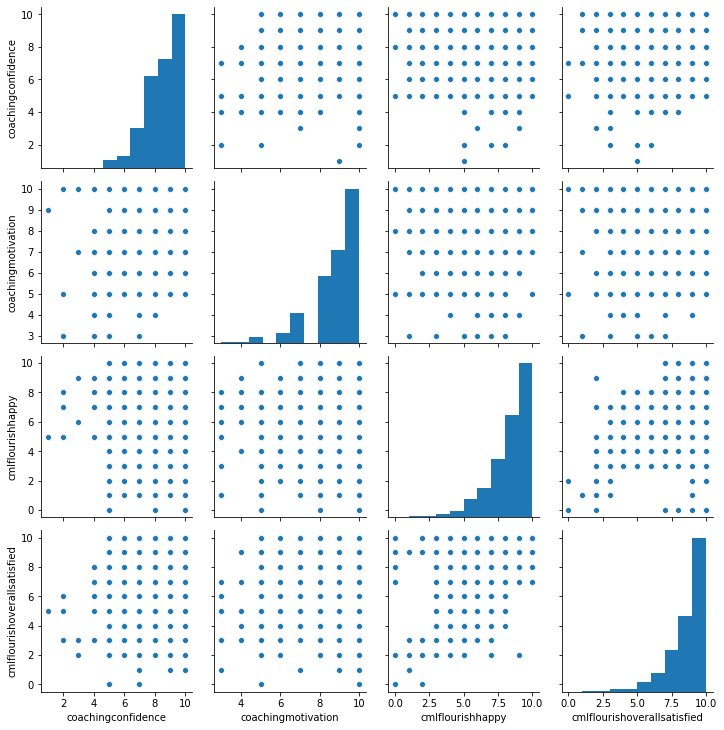

In [56]:
sns.pairplot(small_survey)

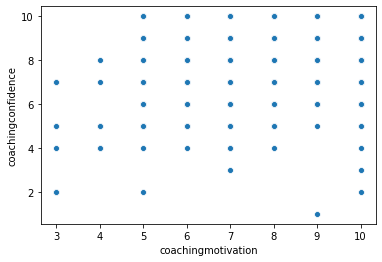

In [57]:
sns.scatterplot(x='coachingmotivation', y='coachingconfidence', data=small_survey)

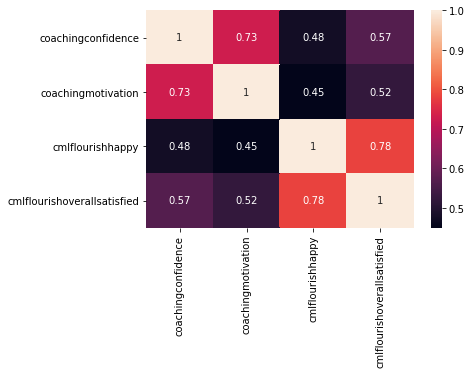

In [58]:

correlation_mat = small_survey.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

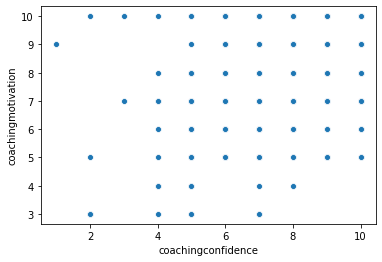

In [59]:
sns.scatterplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

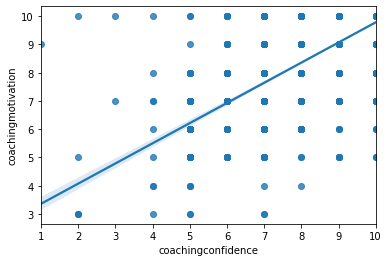

In [60]:
sns.regplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

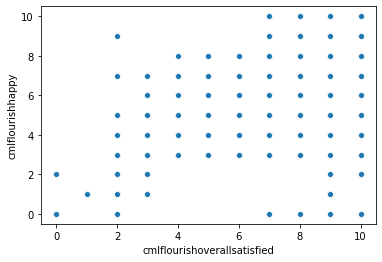

In [61]:
sns.scatterplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

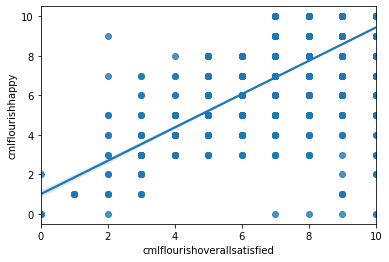

In [62]:
sns.regplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

In [63]:
X= small_survey[['coachingconfidence']]
y= small_survey[['coachingmotivation']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(1527, 1) (1527, 1)
(3101, 1) (3101, 1)


In [65]:
model = linear_model.LinearRegression(normalize=True)

In [66]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [67]:
print(model.score(X_train, y_train))

0.5439404568492759


In [68]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'predicted motivation score')

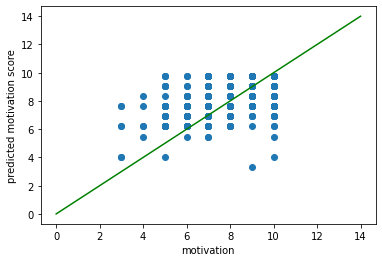

In [69]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.xlabel('motivation')
plt.ylabel('predicted motivation score')

In [70]:
#Multiple Linear Regression using OLS
X = small_survey.drop(["coachingmotivation"],axis=1)
X = sm.add_constant(X)

In [71]:
y= small_survey[['coachingmotivation']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)

In [73]:
multiple_variables = sm.OLS(y_train, X_train)
mv_results = multiple_variables.fit()

In [74]:
mv_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     coachingmotivation   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     638.0
Date:                Thu, 17 Jun 2021   Prob (F-statistic):          1.60e-268
Time:                        10:36:00   Log-Likelihood:                -1860.2
No. Observations:                1527   AIC:                             3728.
Df Residuals:                    1523   BIC:                             3750.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.3584      0.152     15.537      0.000       2.061       2.656
coachingconfidence              0.6426      0.020     32.243      0.000       0.604       0.682
cmlflourishhappy                0.0498      0.021      2.344      0.019       0.008       0.092
cmlflourishoverallsatisfied     0.0605      0.024      2.546      0.011       0.014       0.107
==============================================================================
Omnibus:                       89.944   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.378
Skew:                          -0.135   Prob(JB):                     2.46e-73
Kurtosis:                       5.276   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
y_pred = mv_results.predict(X_test)

Text(0, 0.5, 'Predicted')

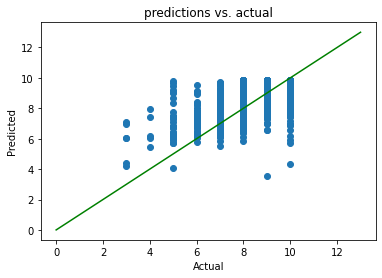

In [76]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,14)],[x for x in range(0,14)], color='green')
plt.title("predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [77]:
X= small_survey[['cmlflourishoverallsatisfied']]
y= small_survey[['cmlflourishhappy']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(1527, 1) (1527, 1)
(3101, 1) (3101, 1)


In [78]:
model2 = linear_model.LinearRegression(normalize=True)

In [79]:
model2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [80]:
print(model2.score(X_train, y_train))

0.6412980643446387


In [81]:
y_pred = model2.predict(X_test)

Text(0, 0.5, 'predicted happiness score')

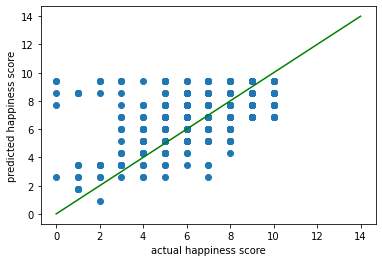

In [82]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.xlabel('actual happiness score')
plt.ylabel('predicted happiness score')


In [83]:
alignment = survey [['coachinghabitsgoalsalignment','coachingmotivation', 'coachingconfidence' ]]

In [84]:
alignment.corr()

,coachingmotivation,coachingconfidence
coachingmotivation,1.00000,0.72994
coachingconfidence,0.72994,1.00000


In [85]:
clients.head()

,limeade_e_id__c,limeade_participant_code__c
0,NaN,559551b6-7d03-4529-9464-dacb82611066
1,NaN,559551b6-7d03-4529-9464-dacb82611066
2,NaN,559551b6-7d03-4529-9464-dacb82611066
3,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829
4,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829


In [86]:
clients = clients.rename(columns={'limeade_participant_code__c': 'external_participant_id'})

clients

,limeade_e_id__c,external_participant_id
0,NaN,559551b6-7d03-4529-9464-dacb82611066
1,NaN,559551b6-7d03-4529-9464-dacb82611066
2,NaN,559551b6-7d03-4529-9464-dacb82611066
3,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829
4,NaN,d3f22c26-ba5e-4590-9505-da5e4ead7829
...,...,...
1991183,NaN,NaN
1991184,NaN,NaN
1991185,NaN,NaN
1991186,NaN,NaN


In [181]:
#creating baseline measurement using the training model 
y_pred = y_train.mean()
y_pred

cmlflourishhappy    7.976424
dtype: float64

In [182]:
#prediction for training baseline data 
y_pred2= [y_pred] * len(y_train)
y_pred2

[cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishhappy    7.976424
 dtype: float64,
 cmlflourishh

In [187]:
#error for training baseline data
mean_abs_error = mean_absolute_error(y_train, y_pred2)
mean_abs_error

1.2409272261056066

In [188]:
#mean squared error for training baseline data 
mean_sqr= mean_squared_error(y_train, y_pred2)
mean_sqr

2.7289792252873295

In [190]:
#creating baseline measurement using the testing model
y_pred = y_test.mean()
y_pred

cmlflourishhappy    7.982586
dtype: float64

In [191]:
#prediction for test baseline data 
y_pred3= [y_pred] * len(y_test)
y_pred3

[cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishhappy    7.982586
 dtype: float64,
 cmlflourishh

In [192]:
#error for test baseline data
mae = mean_absolute_error(y_test, y_pred3)
mae

1.241515230390879

In [ ]:
#mean squared error for test baseline data 
mse= mean_squared_error(y_test, y_pred3)
mse

In [87]:
clients['limeade_e_id__c'].unique()

array([nan, 'Worthington', 'EdwardElmhurst', 'CVWD',
       'InterstateBatteries', 'Busey', 'LeviStrauss', 'Iron Mountain',
       'BeWellWithinA', 'KnaufInsulation', 'Benjamin Moore', 'ATC',
       'AkinGump', 'Teknion', 'LKE', 'TDECU', 'CME Group', 'Arkema',
       'EAWellnessJune', 'iowaclinic', 'HazeldenBettyFord',
       'TherapeuticAssociates', 'RoviCorporation', 'Vibe', 'DriveTime',
       'EAWellnessJanuary', 'Union Bank and Trust', 'PortofSeattle',
       'Villanova', 'EPIC', 'ParkwayCorporation', 'WellmetricsDemo', 'DU',
       'HealthPoint', 'Suddath', 'pilotchemical',
       'Zim Integrated Shipping', 'SSOE', 'Kimray', 'CroweHorwath',
       'Mortenson', 'Macquarie', 'EAWellnessDecember', 'EMC Insurance',
       'PullmanRegionalHospital', 'ExtremeNetworks', 'UticaNational',
       'Pingry School', 'ABDteam', 'DistrictMedicalGroup',
       'AscentResources', 'CBHA', 'City of Redmond', 'BioMarin',
       'CitrinCooperman', 'MODEC', 'MSGCU', 'CCMC', 'Parametrix',
       'RaceT

In [88]:
client_survey= pd.merge(survey, clients, on="external_participant_id")
client_survey.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time,limeade_e_id__c
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,7.0,6.0,6.0,neutral,very_satisfied,NaN,-1.0,1.0,00:01:16,NaN
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,7.0,6.0,6.0,neutral,very_satisfied,NaN,-1.0,1.0,00:01:16,NaN


In [89]:
client_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42512 entries, 0 to 42511
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     42512 non-null  int64          
 1   survey_title                  42512 non-null  object         
 2   status                        42512 non-null  int64          
 3   publish_id                    42512 non-null  int64          
 4   contact_id                    42512 non-null  object         
 5   external_participant_id       42512 non-null  object         
 6   employer_id                   16629 non-null  object         
 7   start_date_time_stamp         42512 non-null  datetime64[ns] 
 8   end_date_time_stamp           42512 non-null  datetime64[ns] 
 9   coachingconfidence            42512 non-null  float64        
 10  coachingmotivation            42512 non-null  float64        
 11  cmlflourishover

In [90]:
client_survey['survey_id'].unique()

array([1616])

In [91]:
client_survey[client_survey['external_participant_id'] != 'nan']

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,completion_time,limeade_e_id__c
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,00:02:18,NaN
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,7.0,6.0,6.0,neutral,very_satisfied,NaN,-1.0,1.0,00:01:16,NaN
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,7.0,6.0,6.0,neutral,very_satisfied,NaN,-1.0,1.0,00:01:16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42507,1616,1:1 Coaching survey,1,1616,0037000001VJgXlAAL,0a2e760c-19b8-466c-93f0-96a96bfef05d,NaN,2021-06-09 00:02:55,2021-06-09 00:04:34,10.0,8.0,9.0,9.0,strongly_agree,satisfied,NaN,NaN,NaN,00:01:39,NaN
42508,1616,1:1 Coaching survey,1,1616,0037000001VJgXlAAL,0a2e760c-19b8-466c-93f0-96a96bfef05d,NaN,2021-06-09 00:02:55,2021-06-09 00:04:34,10.0,8.0,9.0,9.0,strongly_agree,satisfied,NaN,NaN,NaN,00:01:39,NaN
42509,1616,1:1 Coaching survey,1,1616,0037000001VJgXlAAL,0a2e760c-19b8-466c-93f0-96a96bfef05d,NaN,2021-06-09 00:02:55,2021-06-09 00:04:34,10.0,8.0,9.0,9.0,strongly_agree,satisfied,NaN,NaN,NaN,00:01:39,NaN
42510,1616,1:1 Coaching survey,1,1616,0037000001VJgXlAAL,0a2e760c-19b8-466c-93f0-96a96bfef05d,NaN,2021-06-09 00:02:55,2021-06-09 00:04:34,10.0,8.0,9.0,9.0,strongly_agree,satisfied,NaN,NaN,NaN,00:01:39,NaN


In [92]:
client_survey['start_date_time_stamp'].dropna()

0       2021-01-28 20:17:12
1       2021-01-28 20:17:12
2       2021-01-28 20:17:12
3       2021-02-05 20:28:12
4       2021-02-05 20:28:12
                ...        
42507   2021-06-09 00:02:55
42508   2021-06-09 00:02:55
42509   2021-06-09 00:02:55
42510   2021-06-09 00:02:55
42511   2021-06-09 00:02:55
Name: start_date_time_stamp, Length: 42512, dtype: datetime64[ns]

In [93]:
client_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42512 entries, 0 to 42511
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     42512 non-null  int64          
 1   survey_title                  42512 non-null  object         
 2   status                        42512 non-null  int64          
 3   publish_id                    42512 non-null  int64          
 4   contact_id                    42512 non-null  object         
 5   external_participant_id       42512 non-null  object         
 6   employer_id                   16629 non-null  object         
 7   start_date_time_stamp         42512 non-null  datetime64[ns] 
 8   end_date_time_stamp           42512 non-null  datetime64[ns] 
 9   coachingconfidence            42512 non-null  float64        
 10  coachingmotivation            42512 non-null  float64        
 11  cmlflourishover

In [94]:
programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   External Participant Id     2907 non-null   object
 1   Goal Record ID              2922 non-null   object
 2   Overall Goal Status         2922 non-null   object
 3   Total Engagement            2922 non-null   int64 
 4   Total Received Engagements  2922 non-null   int64 
 5   Program: Program Name       2922 non-null   object
 6   Start Date                  2922 non-null   object
 7   Coach Mentor                2283 non-null   object
dtypes: int64(2), object(6)
memory usage: 182.8+ KB


In [95]:
programs.head()

,External Participant Id,Goal Record ID,Overall Goal Status,Total Engagement,Total Received Engagements,Program: Program Name,Start Date,Coach Mentor
0,dc5898f5-cec4-40a4-a70f-150590bdbfaf,20210405-2071006,Partially Complete,5,2,ABB 2021,4/5/21,Coach Christine T.
1,80e4b9b6-ea73-40ed-8984-a19c3df348de,20210317-2062241,Dismissed,1,0,ABB 2021,3/17/21,Coach Karl M.
2,3fbf7076-a235-495f-9542-0f3b26f81482,20210326-2065731,Partially Complete,5,3,ABB 2021,3/26/21,Coach Ramona F.
3,38baff43-13bf-49e6-a003-861c3c9336e5,20210112-2016883,Dismissed,1,0,ABB 2021,1/12/21,Coach Karl M.
4,141749cb-3782-4e22-9649-e691c94023b6,20210323-2064436,In Progress,5,4,ABB 2021,3/23/21,Coach Ramona F.


In [96]:
programs.columns = programs.columns.str.lower()
programs.columns = programs.columns.str.replace(" ","_")

In [97]:
program_name = pd.merge(survey, programs)

In [98]:
program_name.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,confidencedifference,motivationdifference,completion_time,goal_record_id,overall_goal_status,total_engagement,total_received_engagements,program:_program_name,start_date,coach_mentor
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,1.0,0.0,00:02:18,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,...,-1.0,1.0,00:01:16,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-01 12:25:31,2021-03-01 12:26:52,7.0,...,NaN,NaN,00:01:21,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-06 03:28:09,2021-03-06 03:30:02,7.0,...,-2.0,-2.0,00:01:53,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,NaN,2021-03-18 19:34:26,2021-03-18 19:35:54,9.0,...,1.0,0.0,00:01:28,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.


In [99]:
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449 entries, 0 to 5448
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     5449 non-null   int64          
 1   survey_title                  5449 non-null   object         
 2   status                        5449 non-null   int64          
 3   publish_id                    5449 non-null   int64          
 4   contact_id                    5449 non-null   object         
 5   external_participant_id       5449 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         5449 non-null   datetime64[ns] 
 8   end_date_time_stamp           5449 non-null   datetime64[ns] 
 9   coachingconfidence            5449 non-null   float64        
 10  coachingmotivation            5449 non-null   float64        
 11  cmlflourishoveral

In [100]:
program_name['status'].value_counts()

1    5449
Name: status, dtype: int64

In [101]:
program_name = program_name.drop(program_name[program_name.status == 'Incomplete'].index)

/Users/danielle.arneson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [102]:
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449 entries, 0 to 5448
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     5449 non-null   int64          
 1   survey_title                  5449 non-null   object         
 2   status                        5449 non-null   int64          
 3   publish_id                    5449 non-null   int64          
 4   contact_id                    5449 non-null   object         
 5   external_participant_id       5449 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         5449 non-null   datetime64[ns] 
 8   end_date_time_stamp           5449 non-null   datetime64[ns] 
 9   coachingconfidence            5449 non-null   float64        
 10  coachingmotivation            5449 non-null   float64        
 11  cmlflourishoveral

In [103]:
#cleaning joined dataset 
program_name.columns = program_name.columns.str.lower()
program_name.columns = program_name.columns.str.replace(" ","_")
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5449 entries, 0 to 5448
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     5449 non-null   int64          
 1   survey_title                  5449 non-null   object         
 2   status                        5449 non-null   int64          
 3   publish_id                    5449 non-null   int64          
 4   contact_id                    5449 non-null   object         
 5   external_participant_id       5449 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         5449 non-null   datetime64[ns] 
 8   end_date_time_stamp           5449 non-null   datetime64[ns] 
 9   coachingconfidence            5449 non-null   float64        
 10  coachingmotivation            5449 non-null   float64        
 11  cmlflourishoveral

In [104]:
program_name.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,confidencedifference,motivationdifference,completion_time,goal_record_id,overall_goal_status,total_engagement,total_received_engagements,program:_program_name,start_date,coach_mentor
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,1.0,0.0,00:02:18,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,...,-1.0,1.0,00:01:16,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-01 12:25:31,2021-03-01 12:26:52,7.0,...,NaN,NaN,00:01:21,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-06 03:28:09,2021-03-06 03:30:02,7.0,...,-2.0,-2.0,00:01:53,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,NaN,2021-03-18 19:34:26,2021-03-18 19:35:54,9.0,...,1.0,0.0,00:01:28,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.


In [105]:
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Danielle A.'].index)

In [106]:
program_name['coach_mentor'].value_counts()

Coach Jaxon S.        690
Coach Ramona F.       651
Coach Karl M.         650
Coach Kenzie B.       503
Coach Christine T.    503
Coach Briana W.       392
Coach Elyse D.        391
Coach Ari. D          352
Coach Atalie F.       315
Coach Sean M.         253
Coach Jyotica B.      237
Coach Erika K.        104
Coach Maya M.          86
Coach Yana E.          66
Coach Jennifer F.      60
Other                  25
Coach Maia K.           8
Group Coach Mentor      5
Coach Morgan T.         1
Coach Janssen J.        1
Name: coach_mentor, dtype: int64

In [107]:
program_name.columns

Index(['survey_id', 'survey_title', 'status', 'publish_id', 'contact_id',
       'external_participant_id', 'employer_id', 'start_date_time_stamp',
       'end_date_time_stamp', 'coachingconfidence', 'coachingmotivation',
       'cmlflourishoverallsatisfied', 'cmlflourishhappy',
       'coachinghabitsgoalsalignment', 'coachingsatisfaction',
       'coachingfeedback', 'confidencedifference', 'motivationdifference',
       'completion_time', 'goal_record_id', 'overall_goal_status',
       'total_engagement', 'total_received_engagements',
       'program:_program_name', 'start_date', 'coach_mentor'],
      dtype='object')

In [120]:
program_name['program:_program_name'].unique()

array(['CCHMC 2020', 'TeamHealth 2021', 'Allegion 2021',
       'Southeastern Grocers 2021', 'Pingry School 2020/2021',
       'Vericast 2021', 'Dawn Foods 2021', 'Sprouts 2020',
       'Assurant 2021', 'McCain Foods 2021', 'APS 2021',
       'Ensemble Health (BSMH) 2021a', 'RaceTrac 2021', 'Suddath 2021',
       'BeWellWithinA 2021a', 'American Airlines 2020', 'Stryker 2021',
       'BIC 2021', 'Levi Strauss & Co. 2021', 'PSE 2021', 'ABB 2021',
       'Casey Family Programs 2021', 'TAI Wellness 2021',
       'LG&E and KU 2021', 'Honda 2021', 'UNC-HCS 2021',
       'Kindred Healthcare 2021', 'Kindred At Home 2021', 'EMC 2021',
       'Suddath 2018-19', 'Iowa Clinic 2021', 'BPM 2021', 'Maximus 2021',
       'Bayer 2021', 'NWM 2021', 'Board of Pensions 2021', 'Stryker 2015',
       'AWC 2021', 'Lehigh University 2020/2021', 'Ally Financial 2020',
       'Landstar 2021', 'BeWellWithinA 2020', 'LA Care 2021',
       'CBHA 2020/2021', 'Nu Skin 2021', 'CCMC 2020', 'Synopsys 2020',
       'Ba

In [109]:
program_name['coachinghabitsgoalsalignment'].unique()

array(['strongly_agree', 'neutral', 'agree', 'disagree',
       'strongly_disagree'], dtype=object)

In [110]:
program_name['coachinghabitsgoalsalignment'].replace('strongly_disagree','1',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('disagree','2',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('neutral','3',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('agree','4',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('strongly_agree','5',inplace=True)
program_name['coachinghabitsgoalsalignment'].unique()

array(['5', '3', '4', '2', '1'], dtype=object)

In [111]:
program_name['coachingsatisfaction'].replace('very_dissatisfied','1',inplace=True)
program_name['coachingsatisfaction'].replace('dissatisfied','2',inplace=True)
program_name['coachingsatisfaction'].replace('neutral','3',inplace=True)
program_name['coachingsatisfaction'].replace('satisfied','4',inplace=True)
program_name['coachingsatisfaction'].replace('very_satisfied','5',inplace=True)
program_name['coachingsatisfaction'].unique()

array(['5', '4', '3', '1', '2'], dtype=object)

In [112]:
active_programs = program_name.groupby(['program:_program_name']).mean()
active_programs.head()

,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
program:_program_name,,,,,,,,
ABB 2021,9.264706,9.170588,8.964706,8.811765,-0.058824,-0.022059,5.664706,4.835294
APS 2021,9.097561,8.926829,8.780488,8.658537,0.066667,-0.133333,5.097561,3.951220
ASICS 2020/2021,10.000000,10.000000,7.000000,6.000000,NaN,NaN,2.000000,1.000000
AWC 2021,7.631579,7.631579,7.368421,7.368421,-0.071429,0.000000,5.526316,4.631579
Akin Gump 2021,9.200000,9.200000,9.700000,9.700000,-0.125000,-0.125000,6.000000,5.600000


In [118]:
#programs with highest average confidence score 
confidence = active_programs.sort_values(by=['coachingconfidence'], ascending=False)
confidence.head(50)

,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
program:_program_name,,,,,,,,
Viasat 2020/2021,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000
MODEC/SOFEC 2021,10.000000,9.600000,10.000000,9.800000,0.000000,0.000000,8.000000,6.000000
ASICS 2020/2021,10.000000,10.000000,7.000000,6.000000,NaN,NaN,2.000000,1.000000
HHP Webb Insurance Agency 2020,10.000000,9.166667,10.000000,10.000000,0.000000,-0.400000,4.000000,4.000000
NERC 2021 Cancelled,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,0.000000,0.000000
Sage 2021,10.000000,9.666667,9.000000,8.333333,0.000000,-0.500000,0.000000,0.000000
NERC 2021,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,2.500000,2.000000
Redwood 2021,10.000000,10.000000,8.000000,8.000000,0.000000,0.000000,1.000000,1.000000
CCMC 2021,10.000000,10.000000,8.000000,8.666667,0.000000,0.000000,7.000000,5.000000


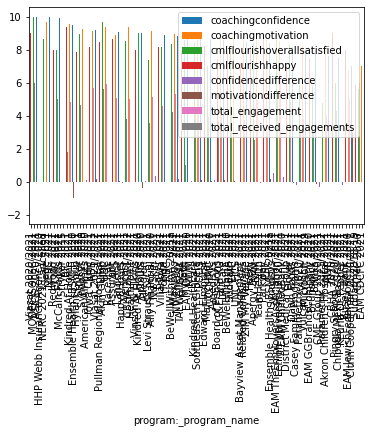

In [133]:
confidence.plot.bar()

In [131]:
confidence_count = confidence.groupby('coachingconfidence').count()
confidence_count.head(50)
                    

,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
coachingconfidence,,,,,,,
6.000000,1,1,1,0,0,1,1
6.285714,1,1,1,1,1,1,1
6.666667,1,1,1,1,1,1,1
7.000000,3,3,3,2,2,3,3
7.333333,1,1,1,1,1,1,1
7.500000,1,1,1,1,1,1,1
7.571429,1,1,1,1,1,1,1
7.600000,1,1,1,1,1,1,1
7.631579,1,1,1,1,1,1,1


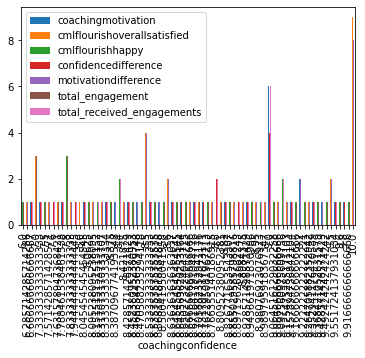

In [134]:
confidence_count.plot.bar()


In [119]:
#progams will hightest average motivation
motivation = active_programs.sort_values(by=['coachingmotivation'], ascending=False)
motivation.head(50)

,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
program:_program_name,,,,,,,,
Viasat 2020/2021,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000
NERC 2021,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,2.500000,2.000000
McCain Foods 2021,9.916667,10.000000,9.583333,9.166667,-0.111111,0.000000,5.416667,4.750000
CCMC 2021,10.000000,10.000000,8.000000,8.666667,0.000000,0.000000,7.000000,5.000000
Redwood 2021,10.000000,10.000000,8.000000,8.000000,0.000000,0.000000,1.000000,1.000000
Vinson & Elkins 2021,9.000000,10.000000,7.000000,8.000000,NaN,NaN,0.000000,0.000000
NERC 2021 Cancelled,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,0.000000,0.000000
ASICS 2020/2021,10.000000,10.000000,7.000000,6.000000,NaN,NaN,2.000000,1.000000
EAM DFYF 2020,8.800000,9.800000,9.000000,8.800000,0.250000,0.000000,6.000000,5.000000


In [137]:
program_name['overall_goal_status'].unique()

array(['Complete', 'No Action', 'Dismissed', 'Partially Complete',
       'In Progress', 'Rollover', 'Registration Phase'], dtype=object)

In [138]:
program_name = program_name.drop(program_name[program_name.overall_goal_status == 'No Action'].index)
program_name = program_name.drop(program_name[program_name.overall_goal_status == 'Registration Phase'].index)

In [139]:
goal_status = program_name.groupby(['overall_goal_status']).mean()
goal_status.head()

,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,total_engagement,total_received_engagements
overall_goal_status,,,,,,,,
Complete,8.759533,8.901167,8.307004,8.055253,-0.008776,-0.005081,6.612062,6.055253
Dismissed,8.768496,8.902148,8.091885,7.822196,-0.004149,0.018672,3.582339,2.280430
In Progress,8.712510,8.888112,8.138306,7.772339,0.006243,-0.046826,3.836053,2.885781
Partially Complete,8.722736,8.776340,8.242144,7.953789,0.045333,-0.016000,3.807763,2.336414
Registration Phase,8.147059,8.794118,7.823529,7.411765,-0.083333,-0.166667,0.058824,0.058824
